# Car Sales EDA

## 01- Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 02- Load dataset

In [ ]:
car = pd.read_excel("Car Dashboard Source (2).xlsx", sheet_name="Orders")
car.head()

,Row ID,Order ID,Order Date,Ship Date,Delivery-TAT,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,...,State/Province,Postal Code,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,1,US-2019-103800,2019-01-03,2019-01-07,4,Standard Class,DP-13000,Darren Powers,Replacement,United States,...,Texas,77095,Central,OFF-PA-10000174,Third Party,Paper,16.448,2,0.2,5.5512
1,2,US-2019-112326,2019-01-04,2019-01-08,4,Standard Class,PO-19195,Phillina Ober,Other,United States,...,Illinois,60540,Central,OFF-BI-10004094,Third Party,Binders,3.540,2,0.8,-5.4870
2,3,US-2019-112326,2019-01-04,2019-01-08,4,Standard Class,PO-19195,Phillina Ober,Other,United States,...,Illinois,60540,Central,OFF-LA-10003223,Third Party,Labels,11.784,3,0.2,4.2717
3,4,US-2019-112326,2019-01-04,2019-01-08,4,Standard Class,PO-19195,Phillina Ober,Other,United States,...,Illinois,60540,Central,OFF-ST-10002743,Third Party,Storage,272.736,3,0.2,-64.7748
4,5,US-2019-141817,2019-01-05,2019-01-12,7,Standard Class,MB-18085,Mick Brown,Replacement,United States,...,Pennsylvania,19143,East,OFF-AR-10003478,Third Party,Art,19.536,3,0.2,4.8840


## 03- EDA Steps

In [ ]:
car.shape

(10194, 21)

In [ ]:
car.dtypes

,0
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Delivery-TAT,int64
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country/Region,object


In [ ]:
car.describe().T

,count,mean,min,25%,50%,75%,max,std
Row ID,10194.0,5097.5,1.0,2549.25,5097.5,7645.75,10194.0,2942.898656
Order Date,10194,2021-04-29 11:48:25.002942976,2019-01-03 00:00:00,2020-05-14 00:00:00,2021-06-25 00:00:00,2022-05-14 00:00:00,2022-12-30 00:00:00,NaN
Ship Date,10194,2021-05-03 10:52:45.626839296,2019-01-07 00:00:00,2020-05-19 00:00:00,2021-06-28 00:00:00,2022-05-18 00:00:00,2023-01-05 00:00:00,NaN
Delivery-TAT,10194.0,3.96135,0.0,3.0,4.0,5.0,11.0,1.742829
Sales,10194.0,228.225854,0.444,17.22,53.91,209.5,22638.48,619.906839
Quantity,10194.0,3.791838,1.0,2.0,3.0,5.0,14.0,2.228317
Discount,10194.0,0.155385,0.0,0.0,0.2,0.2,0.8,0.206249
Profit,10194.0,28.673417,-6599.978,1.7608,8.69,29.297925,8399.976,232.465115


In [ ]:
car.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Delivery-TAT,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country/Region,0


In [ ]:
car.nunique()

,0
Row ID,10194
Order ID,5111
Order Date,1242
Ship Date,1338
Delivery-TAT,9
Ship Mode,4
Customer ID,804
Customer Name,800
Segment,3
Country/Region,2


In [ ]:
car.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Delivery-TAT',
       'Ship Mode', 'Customer ID', 'Customer Name', 'Segment',
       'Country/Region', 'City', 'State/Province', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

## 04- Data Visualization

### Shipping Mode vs Delivery TAT
This barplot shows us average TAT for different shipping modes.

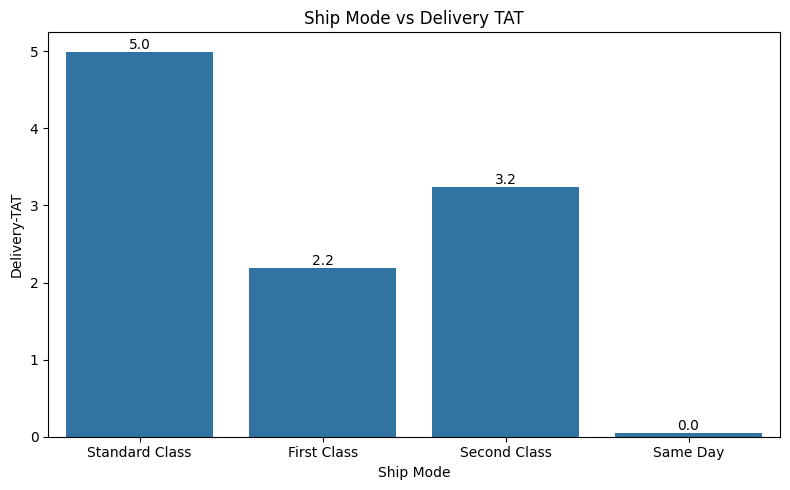

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Ship Mode", y="Delivery-TAT", data=car, errorbar=None)
plt.gca().bar_label(plt.gca().containers[0], fmt='%.1f')  # Data labels
plt.title("Ship Mode vs Delivery TAT")
plt.tight_layout()
plt.show()

### Sales by Segment and Country
This barplot explains us the number of sales per Country with bifurcation of each Segment.

/tmp/ipython-input-11-2710382807.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Country/Region', y='Sales', data=car, hue='Segment', ci=None, ax=ax)


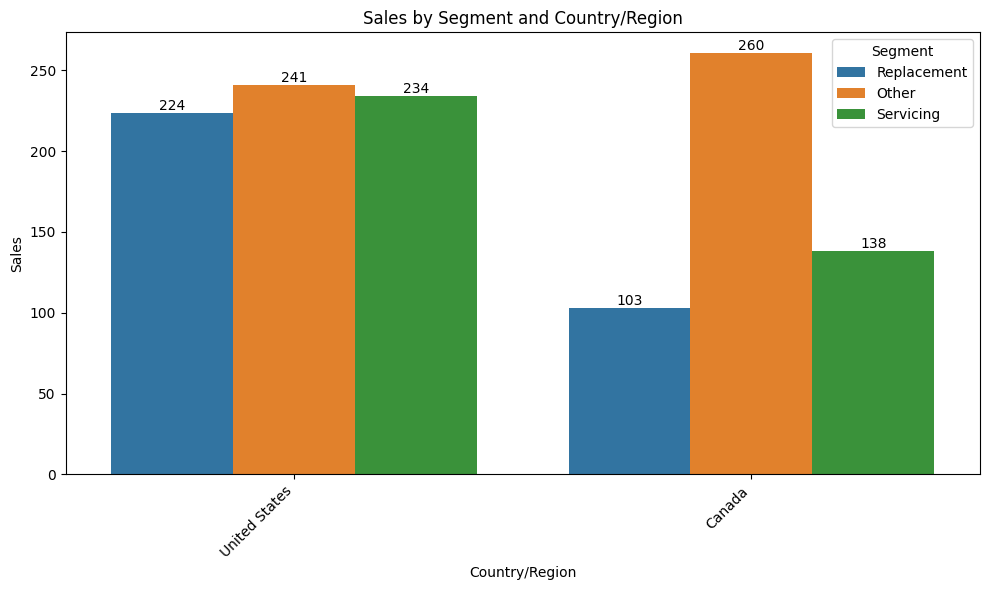

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Country/Region', y='Sales', data=car, hue='Segment', ci=None, ax=ax)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge')
plt.title('Sales by Segment and Country/Region')
plt.xlabel('Country/Region')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Sales Trend Analysis
This detailed analysis shows us the sales over daily, monthly and quarterly period of time.

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load and prep data
car['Order Date'] = pd.to_datetime(car['Order Date'])
car['Sales'] = pd.to_numeric(car['Sales'])

# Aggregations
daily_sales = car.groupby('Order Date')['Sales'].sum().reset_index().sort_values('Order Date')
daily_sales['MA_7'] = daily_sales['Sales'].rolling(7).mean()  # Add moving average

monthly_sales = car.set_index('Order Date').resample('M')['Sales'].sum().reset_index()
quarterly_sales = car.set_index('Order Date').resample('Q')['Sales'].sum().reset_index()

# Create figure
fig = make_subplots(
    rows=3, cols=1,
    subplot_titles=('Daily Sales with 7-Day MA', 'Monthly Sales', 'Quarterly Sales'),
    vertical_spacing=0.1,
    shared_xaxes=False
)

# Add traces
fig.add_trace(
    go.Scatter(x=daily_sales['Order Date'], y=daily_sales['Sales'],
               name='Daily Sales', line=dict(color='blue', width=1)),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=daily_sales['Order Date'], y=daily_sales['MA_7'],
               name='7-Day MA', line=dict(color='red', width=2)),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=monthly_sales['Order Date'], y=monthly_sales['Sales'],
           name='Monthly', marker_color='#1f77b4'),  # Seaborn default blue
    row=2, col=1
)

fig.add_trace(
    go.Bar(x=quarterly_sales['Order Date'], y=quarterly_sales['Sales'],
           name='Quarterly', marker_color='#2ca02c'),  # Seaborn default green
    row=3, col=1
)

# Update layout
fig.update_layout(
    height=900,
    title="<b>Sales Trend Analysis</b><br><sup>Daily, Monthly & Quarterly Patterns</sup>",
    hovermode="x unified",
    template="plotly_white"
)

# Axis formatting
for i, unit in enumerate(['Day', 'Month', 'Quarter'], 1):
    fig.update_xaxes(title_text=f"Time ({unit})", row=i, col=1,
                    tickformat='%b %Y' if i>1 else None)
    fig.update_yaxes(title_text="Sales ($)", row=i, col=1)

fig.show()

/tmp/ipython-input-12-470193796.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = car.set_index('Order Date').resample('M')['Sales'].sum().reset_index()
/tmp/ipython-input-12-470193796.py:14: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sales = car.set_index('Order Date').resample('Q')['Sales'].sum().reset_index()


### Sales Statistics
This detailed summary helps us to understand different parameters and trends for sales made.

In [ ]:
import pandas as pd

# Prepare data
car['Order Date'] = pd.to_datetime(car['Order Date'])
car['Sales'] = pd.to_numeric(car['Sales'])
daily_sales = car.groupby('Order Date')['Sales'].sum().reset_index()
monthly_sales = car.set_index('Order Date').resample('M')['Sales'].sum().reset_index()

# Calculate statistics
stats = {
    'Total Sales': f"${car['Sales'].sum():,.2f}",
    'Average Daily Sales': f"${daily_sales['Sales'].mean():,.2f}",
    'Median Daily Sales': f"${daily_sales['Sales'].median():,.2f}",
    'Daily Sales Std Dev': f"${daily_sales['Sales'].std():,.2f}",
    'Coefficient of Variation': f"{(daily_sales['Sales'].std()/daily_sales['Sales'].mean())*100:.1f}%",
    'Min Daily Sales': f"${daily_sales['Sales'].min():,.2f}",
    'Max Daily Sales': f"${daily_sales['Sales'].max():,.2f}",
    'Sales Range': f"${daily_sales['Sales'].max()-daily_sales['Sales'].min():,.2f}",
    'Number of Trading Days': f"{len(daily_sales):,} days",
    'Date Range': f"{daily_sales['Order Date'].min().strftime('%Y-%m-%d')} to {daily_sales['Order Date'].max().strftime('%Y-%m-%d')}",
    'Average Monthly Sales': f"${monthly_sales['Sales'].mean():,.2f}",
    'Monthly Sales Std Dev': f"${monthly_sales['Sales'].std():,.2f}",
    'Monthly Coefficient of Variation': f"{(monthly_sales['Sales'].std()/monthly_sales['Sales'].mean())*100:.1f}%",
    'Best Month': f"{monthly_sales.loc[monthly_sales['Sales'].idxmax(), 'Order Date'].strftime('%b %Y')} (${monthly_sales['Sales'].max():,.2f})",
    'Worst Month': f"{monthly_sales.loc[monthly_sales['Sales'].idxmin(), 'Order Date'].strftime('%b %Y')} (${monthly_sales['Sales'].min():,.2f})"
}

# Convert to DataFrame
pd.DataFrame(list(stats.items()), columns=['Metric', 'Value'])

/tmp/ipython-input-13-3339078402.py:7: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



,Metric,Value
0,Total Sales,"$2,326,534.35"
1,Average Daily Sales,"$1,873.22"
2,Median Daily Sales,"$1,066.20"
3,Daily Sales Std Dev,"$2,330.28"
4,Coefficient of Variation,124.4%
5,Min Daily Sales,$2.02
6,Max Daily Sales,"$28,106.72"
7,Sales Range,"$28,104.69"
8,Number of Trading Days,"1,242 days"
9,Date Range,2019-01-03 to 2022-12-30


### Product Category Performance Analysis
This detailed analysis shows the different trends for sub-category of products against sales.

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Data Preparation
car['Order Date'] = pd.to_datetime(car['Order Date'])
car['Sales'] = pd.to_numeric(car['Sales'])

# Time-based aggregations
monthly_sales = car.set_index('Order Date').groupby([pd.Grouper(freq='M'), 'Category'])['Sales'].sum().reset_index()
quarterly_sales = car.set_index('Order Date').groupby([pd.Grouper(freq='Q'), 'Category'])['Sales'].sum().reset_index()

# Category statistics
cat_stats = car.groupby('Category')['Sales'].agg(['sum', 'mean', 'std', 'count'])
cat_stats['CV%'] = (cat_stats['std'] / cat_stats['mean'] * 100).round(1)

# Visualization Setup
fig = make_subplots(
    rows=3, cols=2,
    specs=[[{"type": "scatter"}, {"type": "box"}],
           [{"type": "scatter"}, {"type": "bar"}],
           [{"colspan": 2}, None]],
    subplot_titles=(
        'Monthly Sales Trend', 'Sales Distribution by Category',
        'Quarterly Sales Pattern', 'Sales Volatility (CV%)',
        'Category Market Share Over Time'
    )
)

# Color scheme
colors = px.colors.qualitative.Set3

# Plot 1: Monthly Trend (Stacked Area)
for i, (cat, data) in enumerate(monthly_sales.groupby('Category')):
    fig.add_trace(
        go.Scatter(
            x=data['Order Date'], y=data['Sales'],
            name=cat, stackgroup='one',
            line=dict(color=colors[i]),
            hovertemplate="%{x|%b %Y}: %{y:$,.0f}<extra>%{fullData.name}</extra>"
        ), row=1, col=1)

# Plot 2: Sales Distribution (Boxplot)
for i, (cat, data) in enumerate(car.groupby('Category')):
    fig.add_trace(
        go.Box(
            y=data['Sales'], name=cat,
            marker_color=colors[i],
            boxmean=True,
            hovertemplate="%{y:$,.0f}<extra>%{fullData.name}</extra>"
        ), row=1, col=2)

# Plot 3: Quarterly Trends
for i, (cat, data) in enumerate(quarterly_sales.groupby('Category')):
    fig.add_trace(
        go.Scatter(
            x=data['Order Date'], y=data['Sales'],
            mode='lines+markers',
            line=dict(color=colors[i]),
            showlegend=False,
            hovertemplate="Q%{x|%q %Y}: %{y:$,.0f}<extra>%{fullData.name}</extra>"
        ), row=2, col=1)

# Plot 4: Volatility (CV%)
fig.add_trace(
    go.Bar(
        x=cat_stats.index, y=cat_stats['CV%'],
        marker_color=colors[:len(cat_stats)],
        text=cat_stats['CV%'],
        texttemplate='%{text:.1f}%',
        textposition='outside',
        hovertemplate="%{x}: %{y:.1f}%<extra></extra>"
    ), row=2, col=2)

# Plot 5: Market Share
monthly_total = monthly_sales.groupby('Order Date')['Sales'].sum()
for i, (cat, data) in enumerate(monthly_sales.groupby('Category')):
    share = (data.set_index('Order Date')['Sales'] / monthly_total * 100).reset_index()
    fig.add_trace(
        go.Scatter(
            x=share['Order Date'], y=share['Sales'],
            line=dict(color=colors[i]),
            showlegend=False,
            hovertemplate="%{x|%b %Y}: %{y:.1f}%<extra>%{fullData.name}</extra>"
        ), row=3, col=1)

# Layout Configuration
fig.update_layout(
    height=1000,
    title="Product Category Performance Analysis",
    hovermode="x unified",
    template="plotly_white",
    margin=dict(t=100))

# Axis Labels
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_xaxes(title_text="Category", row=1, col=2)
fig.update_xaxes(title_text="Date", row=2, col=1)
fig.update_xaxes(title_text="Category", row=2, col=2)
fig.update_xaxes(title_text="Date", row=3, col=1)

fig.update_yaxes(title_text="Sales ($)", row=1, col=1)
fig.update_yaxes(title_text="Sales ($)", row=1, col=2)
fig.update_yaxes(title_text="Sales ($)", row=2, col=1)
fig.update_yaxes(title_text="CV (%)", row=2, col=2)
fig.update_yaxes(title_text="Market Share (%)", row=3, col=1)

fig.show()

/tmp/ipython-input-14-3505472780.py:10: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/tmp/ipython-input-14-3505472780.py:11: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.



### Product Category Statistics
This summary helps us to understand the trends for each product sub-category in detail.

In [ ]:
import pandas as pd
car['Order Date'] = pd.to_datetime(car['Order Date'])
car['Sales'] = pd.to_numeric(car['Sales'])

# Category Analysis
def format_currency(x):
    return f"${x:,.2f}"

category_stats = (
    car.groupby('Category')['Sales']
    .agg(Total_Sales='sum',
         Avg_Order_Value='mean',
         Std_Dev='std',
         Order_Count='count',
         Min_Sale='min',
         Max_Sale='max')
    .assign(
        Market_Share=lambda x: (x['Total_Sales']/x['Total_Sales'].sum()*100).round(1),
        CV_Order=lambda x: (x['Std_Dev']/x['Avg_Order_Value']*100).round(1),
        Sales_Range=lambda x: x['Max_Sale'] - x['Min_Sale']
    )
)

# Monthly Volatility Analysis
monthly_stats = (
    car.assign(Year_Month=car['Order Date'].dt.to_period('M'))
    .groupby(['Year_Month', 'Category'])['Sales']
    .sum()
    .groupby('Category')
    .agg(Monthly_Avg='mean',
         Monthly_Std='std')
    .assign(Monthly_CV=lambda x: (x['Monthly_Std']/x['Monthly_Avg']*100).round(1))
    .reset_index()
)

# Merge and Format Results
final_output = (
    category_stats.reset_index()
    .merge(monthly_stats, on='Category')
    .assign(
        **{f'{col}_Formatted': lambda x: x[col].apply(format_currency)
        for col in ['Total_Sales', 'Avg_Order_Value', 'Std_Dev',
                   'Min_Sale', 'Max_Sale', 'Sales_Range',
                   'Monthly_Avg', 'Monthly_Std']
    })
)

# Create Summary Table
summary_table = final_output[[
    'Category', 'Total_Sales_Formatted', 'Market_Share',
    'Avg_Order_Value_Formatted', 'Order_Count',
    'CV_Order', 'Monthly_CV'
]].rename(columns={
    'Total_Sales_Formatted': 'Total Sales',
    'Market_Share': 'Market Share (%)',
    'Avg_Order_Value_Formatted': 'Avg Order Value',
    'CV_Order': 'Order Volatility (CV%)',
    'Monthly_CV': 'Monthly Volatility (CV%)'
})

summary_table

,Category,Total Sales,Market Share (%),Avg Order Value,Order_Count,Order Volatility (CV%),Monthly Volatility (CV%)
0,Direct Sale,"$9,834.20",30.0,"$9,834.20",2007,146.6,66.2
1,Other,"$19,937.06",7.6,"$19,937.06",959,197.8,123.3
2,Pre Book,"$11,094.53",33.3,"$11,094.53",1707,250.5,67.3
3,Third Party,"$9,437.92",29.0,"$9,437.92",5521,326.2,65.7


### Sales & Profit Relationship Analysis
This analysis depicts the different relations for sales and profit with profit-margin distribution.

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Data Preparation
car['Order Date'] = pd.to_datetime(car['Order Date'])
car['Sales'] = pd.to_numeric(car['Sales'])
car['Profit'] = pd.to_numeric(car['Profit'])
car['Profit_Margin_%'] = (car['Profit'] / car['Sales'] * 100).round(2)

# Create aggregations
daily = car.groupby('Order Date').agg({'Sales':'sum', 'Profit':'sum'}).reset_index()
monthly = car.set_index('Order Date').resample('M').agg({'Sales':'sum', 'Profit':'sum'}).reset_index()
monthly['Profit_Margin_%'] = (monthly['Profit'] / monthly['Sales'] * 100).round(2)
categories = car.groupby('Category').agg({'Sales':'sum', 'Profit':'sum'}).reset_index()

# Visualization Setup
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=(
        'Order-Level Profitability', 'Profit Margin Distribution',
        'Daily Performance', 'Monthly Performance',
        'Category Comparison', 'Margin Trend'
    ),
    specs=[[{}, {}], [{}, {}], [{}, {}]],
    vertical_spacing=0.1,
    horizontal_spacing=0.1
)

# Color scheme
colors = px.colors.qualitative.Set3

# 1. Order-Level Scatter with Trendline
fig.add_trace(
    go.Scatter(
        x=car['Sales'], y=car['Profit'],
        mode='markers', name='Orders',
        marker=dict(size=3, opacity=0.6, color='blue'),
        hovertemplate='Sales: $%{x:,.2f}<br>Profit: $%{y:,.2f}<extra></extra>',
    ), row=1, col=1)

# Add trendline
trend = np.poly1d(np.polyfit(car['Sales'], car['Profit'], 1))
fig.add_trace(
    go.Scatter(
        x=car['Sales'], y=trend(car['Sales']),
        mode='lines', name='Trend',
        line=dict(color='red', width=2),
    ), row=1, col=1)

# 2. Profit Margin Distribution
for i, cat in enumerate(car['Category'].unique()):
    fig.add_trace(
        go.Box(
            y=car[car['Category']==cat]['Profit_Margin_%'],
            name=cat, marker_color=colors[i],
            showlegend=False
        ), row=1, col=2)

# 3. Daily Performance
fig.add_trace(
    go.Scatter(
        x=daily['Sales'], y=daily['Profit'],
        mode='markers', name='Daily',
        marker=dict(size=5, color='green'),
        hovertemplate='$%{x:,.2f} Sales<br>$%{y:,.2f} Profit<extra></extra>',
    ), row=2, col=1)

# 4. Monthly Performance
fig.add_trace(
    go.Scatter(
        x=monthly['Sales'], y=monthly['Profit'],
        mode='markers', name='Monthly',
        marker=dict(size=8, color='orange'),
        text=monthly['Order Date'].dt.strftime('%b %Y'),
        hovertemplate='%{text}<br>$%{x:,.2f} Sales<br>$%{y:,.2f} Profit<extra></extra>',
    ), row=2, col=2)

# 5. Category Comparison
fig.add_trace(
    go.Scatter(
        x=categories['Sales'], y=categories['Profit'],
        mode='markers+text', name='Categories',
        marker=dict(size=15, color=colors),
        text=categories['Category'], textposition='top center',
        hovertemplate='%{text}<br>$%{x:,.2f} Sales<br>$%{y:,.2f} Profit<extra></extra>',
    ), row=3, col=1)

# 6. Margin Trend
fig.add_trace(
    go.Scatter(
        x=monthly['Order Date'], y=monthly['Profit_Margin_%'],
        mode='lines+markers', name='Margin',
        line=dict(color='purple', width=2),
        hovertemplate='%{x|%b %Y}<br>%{y:.1f}% Margin<extra></extra>',
    ), row=3, col=2)

# Corrected Axis Labels
fig.update_xaxes(title_text="Sales ($)", row=1, col=1)
fig.update_yaxes(title_text="Profit ($)", row=1, col=1)
fig.update_xaxes(title_text="Category", row=1, col=2)
fig.update_yaxes(title_text="Margin (%)", row=1, col=2)
fig.update_xaxes(title_text="Daily Sales ($)", row=2, col=1)
fig.update_yaxes(title_text="Daily Profit ($)", row=2, col=1)
fig.update_xaxes(title_text="Monthly Sales ($)", row=2, col=2)
fig.update_yaxes(title_text="Monthly Profit ($)", row=2, col=2)
fig.update_xaxes(title_text="Category Sales ($)", row=3, col=1)
fig.update_yaxes(title_text="Category Profit ($)", row=3, col=1)
fig.update_xaxes(title_text="Month", row=3, col=2)
fig.update_yaxes(title_text="Margin (%)", row=3, col=2)

# Final Layout
fig.update_layout(
    height=1000,
    title='Sales & Profit Relationship Analysis',
    hovermode='closest',
    template='plotly_white',
    showlegend=False
)

fig.update_xaxes(tickangle=45, row=3, col=2)
fig.show()

/tmp/ipython-input-16-7368247.py:14: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



### Delivery Impact Analysis
This detailed summary helps us to understand the shipping delays impact sales/profit.

In [ ]:
import pandas as pd

# Data Preparation
date_cols = ['Order Date', 'Ship Date']
num_cols = ['Sales', 'Profit', 'Delivery-TAT']
car[date_cols] = car[date_cols].apply(pd.to_datetime)
car[num_cols] = car[num_cols].apply(pd.to_numeric)

# Calculations
car['Delivery_Days'] = (car['Ship Date'] - car['Order Date']).dt.days
car['Profit_Margin_%'] = (car['Profit']/car['Sales']*100).round(2)
car['Delivery_Category'] = pd.cut(car['Delivery_Days'],
                                bins=[0, 3, 7, 14, float('inf')],
                                labels=['Fast (0-3)', 'Standard (4-7)', 'Slow (8-14)', 'Very Slow (15+)'])

# Delivery Analysis
delivery_stats = car['Delivery_Days'].agg(['mean', 'median', 'std', 'min', 'max']).round(1)
correlations = car[['Sales', 'Profit', 'Profit_Margin_%']].corrwith(car['Delivery_Days']).round(3)

# Grouped Analysis
delivery_impact = car.groupby('Delivery_Category').agg(
    Order_Count=('Sales', 'count'),
    Avg_Sales=('Sales', 'mean'),
    Total_Sales=('Sales', 'sum'),
    Avg_Profit=('Profit', 'mean'),
    Avg_Margin=('Profit_Margin_%', 'mean'),
    Avg_Delivery=('Delivery_Days', 'mean')
).round(2)

ship_mode_analysis = car.groupby('Ship Mode').agg(
    Avg_Delivery=('Delivery_Days', 'mean'),
    Std_Delivery=('Delivery_Days', 'std'),
    Avg_Sales=('Sales', 'mean'),
    Avg_Profit=('Profit', 'mean'),
    Avg_Margin=('Profit_Margin_%', 'mean')
).round(2)

# Summary Metrics
fast_orders = (car['Delivery_Category'] == 'Fast (0-3)').mean() * 100
slow_orders = (car['Delivery_Days'] > 7).mean() * 100
margin_diff = delivery_impact['Avg_Margin'].max() - delivery_impact['Avg_Margin'].min()

summary_data = {
    'Metric': [
        'Average Delivery Time', 'Median Delivery Time', 'Delivery Time Std Dev',
        'Fastest Delivery', 'Slowest Delivery', 'Sales-Delivery Correlation',
        'Profit-Delivery Correlation', 'Margin-Delivery Correlation',
        'Best Delivery Category', 'Worst Delivery Category',
        'Fast Delivery Orders (%)', 'Slow Delivery Orders (%)',
        'Margin Impact of Delays', 'Most Reliable Ship Mode', 'Fastest Ship Mode'
    ],
    'Value': [
        f"{delivery_stats['mean']} days", f"{delivery_stats['median']} days",
        f"{delivery_stats['std']} days", f"{delivery_stats['min']} days",
        f"{delivery_stats['max']} days", f"{correlations['Sales']}",
        f"{correlations['Profit']}", f"{correlations['Profit_Margin_%']}",
        f"{delivery_impact['Avg_Margin'].idxmax()} ({delivery_impact['Avg_Margin'].max():.1f}%)",
        f"{delivery_impact['Avg_Margin'].idxmin()} ({delivery_impact['Avg_Margin'].min():.1f}%)",
        f"{fast_orders:.1f}%", f"{slow_orders:.1f}%",
        f"{margin_diff:.1f}% difference",
        f"{ship_mode_analysis['Std_Delivery'].idxmin()} ({ship_mode_analysis['Std_Delivery'].min():.1f} std)",
        f"{ship_mode_analysis['Avg_Delivery'].idxmin()} ({ship_mode_analysis['Avg_Delivery'].min():.1f} days)"
    ]
}

pd.DataFrame(summary_data)

/tmp/ipython-input-17-3347805202.py:21: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Metric,Value
0,Average Delivery Time,4.0 days
1,Median Delivery Time,4.0 days
2,Delivery Time Std Dev,1.7 days
3,Fastest Delivery,0.0 days
4,Slowest Delivery,11.0 days
5,Sales-Delivery Correlation,-0.007
6,Profit-Delivery Correlation,-0.004
7,Margin-Delivery Correlation,-0.01
8,Best Delivery Category,Slow (8-14) (35.7%)
9,Worst Delivery Category,Standard (4-7) (11.4%)


### Customer Segmentation & Behavior
• RFM Analysis (Recency, Frequency, Monetary):
- Recency: When was the last purchase of each customer?\
This summary shows us the indepth analysis for each customer.


In [ ]:
import pandas as pd

# Data Preparation
car['Order Date'] = pd.to_datetime(car['Order Date'])
car['Sales'] = pd.to_numeric(car['Sales'])

# Customer Last Purchase Analysis
customer_last_purchase = car.groupby('Customer ID').agg(
    Last_Purchase_Date=('Order Date', 'max'),
    Customer_Name=('Customer Name', 'first'),
    Total_Sales=('Sales', 'sum'),
    Order_Count=('Sales', 'count'),
    Segment=('Segment', 'first'),
    Region=('Region', 'first')
).reset_index()

# Calculate days since last purchase
latest_date = car['Order Date'].max()
customer_last_purchase['Days_Since_Last_Purchase'] = (latest_date - customer_last_purchase['Last_Purchase_Date']).dt.days

# Categorize recency
def categorize_recency(days):
    if days <= 30: return 'Recent (0-30 days)'
    elif days <= 90: return 'Moderate (31-90 days)'
    elif days <= 180: return 'At Risk (91-180 days)'
    elif days <= 365: return 'Dormant (181-365 days)'
    else: return 'Lost (365+ days)'

customer_last_purchase['Recency_Category'] = customer_last_purchase['Days_Since_Last_Purchase'].apply(categorize_recency)

# Keep only requested columns
final_output = customer_last_purchase[[
    'Customer ID', 'Last_Purchase_Date', 'Customer_Name',
    'Total_Sales', 'Order_Count', 'Segment', 'Region'
]].rename(columns={'Customer_ID': 'Customer ID'})

final_output

,Customer ID,Last_Purchase_Date,Customer_Name,Total_Sales,Order_Count,Segment,Region
0,AA-10315,2022-06-29,Alex Avila,5563.560,11,Replacement,West
1,AA-10375,2022-12-11,Allen Armold,1056.390,15,Replacement,West
2,AA-10480,2022-04-15,Andrew Allen,1790.512,12,Replacement,East
3,AA-10645,2022-11-05,Anna Andreadi,5086.935,18,Replacement,East
4,AB-10015,2021-11-10,Aaron Bergman,886.156,6,Replacement,Central
...,...,...,...,...,...,...,...
799,XP-21865,2022-11-17,Xylona Preis,2503.156,34,Replacement,Central
800,YC-21895,2022-12-26,Yoseph Carroll,5454.350,8,Servicing,East
801,YS-21880,2022-12-21,Yana Sorensen,6720.444,12,Servicing,East
802,ZC-21910,2022-11-06,Zuschuss Carroll,8025.707,31,Replacement,West


- Frequency: How often do customers buy?\
This detailed summary helps us to understand the customer's behaviour as how often they order.


In [ ]:
import pandas as pd

# Data Preparation
car['Order Date'] = pd.to_datetime(car['Order Date'])
car['Sales'] = pd.to_numeric(car['Sales'])

# Customer Frequency Analysis
customer_freq = car.groupby('Customer ID').agg(
    Order_Count=('Order Date', 'count'),
    First_Purchase=('Order Date', 'min'),
    Last_Purchase=('Order Date', 'max'),
    Customer_Name=('Customer Name', 'first'),
    Total_Sales=('Sales', 'sum'),
    Avg_Order_Value=('Sales', 'mean'),
    Segment=('Segment', 'first'),
    Region=('Region', 'first')
).reset_index()

# Calculate metrics
customer_freq['Lifespan_Days'] = (customer_freq['Last_Purchase'] - customer_freq['First_Purchase']).dt.days.fillna(0)
customer_freq['Purchase_Freq_Per_Year'] = np.where(
    customer_freq['Lifespan_Days'] > 0,
    (customer_freq['Order_Count'] - 1) / (customer_freq['Lifespan_Days'] / 365.25),
    0
)
customer_freq['Days_Between_Orders'] = np.where(
    customer_freq['Order_Count'] > 1,
    customer_freq['Lifespan_Days'] / (customer_freq['Order_Count'] - 1),
    np.nan
)

# Frequency Categories
def freq_category(orders):
    if orders == 1: return 'One-time'
    elif orders <= 3: return 'Occasional'
    elif orders <= 7: return 'Regular'
    elif orders <= 15: return 'Frequent'
    else: return 'Very Frequent'

customer_freq['Frequency_Category'] = customer_freq['Order_Count'].apply(freq_category)

# Summary Stats
total_customers = len(customer_freq)
one_time_pct = (customer_freq['Order_Count'] == 1).mean() * 100
repeat_pct = (customer_freq['Order_Count'] > 1).mean() * 100
high_freq_pct = (customer_freq['Order_Count'] >= 8).mean() * 100

stats = {
    'Metric': [
        'Total Customers', 'Avg Orders', 'Median Orders', 'Max Orders',
        'Avg Days Between Orders', 'Median Days Between',
        'Avg Purchase Freq (per year)', 'One-time Customers (%)',
        'Repeat Customers (%)', 'High-Freq Customers (%)',
        'Avg Customer Lifespan (days)', 'Median Lifespan (days)'
    ],
    'Value': [
        f"{total_customers:,}",
        f"{customer_freq['Order_Count'].mean():.1f}",
        f"{customer_freq['Order_Count'].median()}",
        f"{customer_freq['Order_Count'].max()}",
        f"{customer_freq['Days_Between_Orders'].mean():.0f}",
        f"{customer_freq['Days_Between_Orders'].median():.0f}",
        f"{customer_freq['Purchase_Freq_Per_Year'].mean():.1f}",
        f"{one_time_pct:.1f}%",
        f"{repeat_pct:.1f}%",
        f"{high_freq_pct:.1f}%",
        f"{customer_freq['Lifespan_Days'].mean():.0f}",
        f"{customer_freq['Lifespan_Days'].median():.0f}"
    ]
}

pd.DataFrame(stats)

,Metric,Value
0,Total Customers,804
1,Avg Orders,12.7
2,Median Orders,12.0
3,Max Orders,41
4,Avg Days Between Orders,114
5,Median Days Between,93
6,Avg Purchase Freq (per year),5.7
7,One-time Customers (%),0.6%
8,Repeat Customers (%),99.4%
9,High-Freq Customers (%),77.7%


- Monetary: How much do they spend?
This helps us to understand customer segmentation.

In [ ]:
import pandas as pd

# Data Preparation
car[['Sales', 'Profit']] = car[['Sales', 'Profit']].apply(pd.to_numeric)
car['Order Date'] = pd.to_datetime(car['Order Date'])

# Customer Spending Analysis
customer_spending = car.groupby(['Customer ID', 'Customer Name']).agg(
    Total_Sales=('Sales', 'sum'),
    Order_Count=('Sales', 'count'),
    Avg_Order_Value=('Sales', 'mean'),
    Total_Profit=('Profit', 'sum'),
    Avg_Profit=('Profit', 'mean'),
    First_Purchase=('Order Date', 'min'),
    Last_Purchase=('Order Date', 'max'),
    Segment=('Segment', 'first'),
    Region=('Region', 'first')
).round(2).reset_index()

# Spending Categories
def categorize_spending(x):
    if x >= 10000: return 'VIP ($10,000+)'
    elif x >= 5000: return 'High Value ($5,000-$9,999)'
    elif x >= 2000: return 'Medium Value ($2,000-$4,999)'
    elif x >= 1000: return 'Regular ($1,000-$1,999)'
    elif x >= 500: return 'Low Value ($500-$999)'
    else: return 'Minimal (<$500)'

customer_spending['Spending_Category'] = customer_spending['Total_Sales'].apply(categorize_spending)
customer_summary = customer_spending.sort_values('Total_Sales', ascending=False)

# Spending Summary
spending_summary = customer_summary.groupby('Spending_Category').agg(
    Customer_Count=('Customer ID', 'count'),
    Total_Sales_Sum=('Total_Sales', 'sum'),
    Avg_Sales_Per_Customer=('Total_Sales', 'mean'),
    Min_Sales=('Total_Sales', 'min'),
    Max_Sales=('Total_Sales', 'max'),
    Avg_Orders=('Order_Count', 'mean'),
    Avg_Order_Value=('Avg_Order_Value', 'mean')
).round(2)

total_customers = len(customer_summary)
total_sales = customer_summary['Total_Sales'].sum()
spending_summary = spending_summary.assign(
    Customer_Pct=(spending_summary['Customer_Count']/total_customers*100).round(1),
    Sales_Pct=(spending_summary['Total_Sales_Sum']/total_sales*100).round(1)
)

# Output Results
print("CUSTOMER SPENDING ANALYSIS SUMMARY".center(50, '='))
print(f"\nTotal Customers: {total_customers:,}")
print(f"Total Sales: ${total_sales:,.2f}")
print(f"Average Sales per Customer: ${customer_summary['Total_Sales'].mean():,.2f}")
print(f"Median Sales per Customer: ${customer_summary['Total_Sales'].median():,.2f}")

print("\nSPENDING CATEGORY BREAKDOWN:".center(40, '='))
for category in spending_summary.index:
    stats = spending_summary.loc[category]
    print(f"\n{category}:")
    print(f"  Customers: {stats['Customer_Count']:,} ({stats['Customer_Pct']}%)")
    print(f"  Total Sales: ${stats['Total_Sales_Sum']:,.2f} ({stats['Sales_Pct']}%)")
    print(f"  Avg per Customer: ${stats['Avg_Sales_Per_Customer']:,.2f}")
    print(f"  Sales Range: ${stats['Min_Sales']:,.2f}-${stats['Max_Sales']:,.2f}")
    print(f"  Avg Orders: {stats['Avg_Orders']:.1f}")
    print(f"  Avg Order Value: ${stats['Avg_Order_Value']:,.2f}")

# Top 20 Customers
top_20 = customer_summary.head(20).assign(
    Total_Sales_Fmt=lambda x: x['Total_Sales'].apply('${:,.2f}'.format),
    Avg_Order_Value_Fmt=lambda x: x['Avg_Order_Value'].apply('${:,.2f}'.format)
)[['Customer Name', 'Total_Sales_Fmt', 'Order_Count', 'Avg_Order_Value_Fmt', 'Segment', 'Region', 'Spending_Category']]

print("\nTOP 20 HIGHEST SPENDING CUSTOMERS:".center(50, '='))
print(top_20.to_string(index=False))

# Return summary
spending_summary.reset_index()

========CUSTOMER SPENDING ANALYSIS SUMMARY========

Total Customers: 804
Total Sales: $2,326,534.41
Average Sales per Customer: $2,893.70
Median Sales per Customer: $2,243.39
=====
SPENDING CATEGORY BREAKDOWN:======

High Value ($5,000-$9,999):
  Customers: 98.0 (12.2%)
  Total Sales: $657,884.30 (28.3%)
  Avg per Customer: $6,713.11
  Sales Range: $5,016.49-$9,799.92
  Avg Orders: 18.9
  Avg Order Value: $416.17

Low Value ($500-$999):
  Customers: 97.0 (12.1%)
  Total Sales: $75,535.83 (3.2%)
  Avg per Customer: $778.72
  Sales Range: $515.20-$993.90
  Avg Orders: 8.2
  Avg Order Value: $116.34

Medium Value ($2,000-$4,999):
  Customers: 326.0 (40.5%)
  Total Sales: $1,034,767.23 (44.5%)
  Avg per Customer: $3,174.13
  Sales Range: $2,005.60-$4,985.68
  Avg Orders: 14.7
  Avg Order Value: $243.16

Minimal (<$500):
  Customers: 81.0 (10.1%)
  Total Sales: $19,782.74 (0.9%)
  Avg per Customer: $244.23
  Sales Range: $4.83-$497.01
  Avg Orders: 5.0
  Avg Order Value: $53.71

Regular ($1

,Spending_Category,Customer_Count,Total_Sales_Sum,Avg_Sales_Per_Customer,Min_Sales,Max_Sales,Avg_Orders,Avg_Order_Value,Customer_Pct,Sales_Pct
0,"High Value ($5,000-$9,999)",98,657884.30,6713.11,5016.49,9799.92,18.93,416.17,12.2,28.3
1,Low Value ($500-$999),97,75535.83,778.72,515.20,993.90,8.23,116.34,12.1,3.2
2,"Medium Value ($2,000-$4,999)",326,1034767.23,3174.13,2005.60,4985.68,14.74,243.16,40.5,44.5
3,Minimal (<$500),81,19782.74,244.23,4.83,497.01,4.95,53.71,10.1,0.9
4,"Regular ($1,000-$1,999)",181,263193.18,1454.11,1006.36,1990.31,10.59,159.76,22.5,11.3
5,"VIP ($10,000+)",21,275371.13,13112.91,10310.88,25043.05,19.90,784.84,2.6,11.8


### Top 5 Customers Analysis
This barplot shows us the top 5 customers resulting in most sales.

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Data Preparation
car['Order Date'] = pd.to_datetime(car['Order Date'])
car['Sales'] = pd.to_numeric(car['Sales'])
car['Profit'] = pd.to_numeric(car['Profit'])

# Customer Analysis
customer_analysis = car.groupby(['Customer ID', 'Customer Name']).agg(
    Total_Sales=('Sales', 'sum'),
    Order_Count=('Sales', 'count'),
    Avg_Order_Value=('Sales', 'mean'),
    Total_Profit=('Profit', 'sum'),
    Avg_Profit=('Profit', 'mean'),
    First_Purchase=('Order Date', 'min'),
    Last_Purchase=('Order Date', 'max'),
    Segment=('Segment', 'first'),
    Region=('Region', 'first')
).round(2).reset_index()

# Additional Metrics
customer_analysis['Lifespan_Days'] = (customer_analysis['Last_Purchase'] - customer_analysis['First_Purchase']).dt.days
customer_analysis['Profit_Margin_%'] = (customer_analysis['Total_Profit'] / customer_analysis['Total_Sales'] * 100).round(1)

# Top 5 Customers
top_5 = customer_analysis.sort_values('Total_Sales', ascending=False).head(5)

# Print Summary
print("TOP 5 HIGHEST-VALUE CUSTOMERS".center(50, '='))
for _, row in top_5.iterrows():
    print(f"\n{row['Customer Name']}")
    print(f"  Total Sales: ${row['Total_Sales']:,.2f}")
    print(f"  Profit: ${row['Total_Profit']:,.2f} ({row['Profit_Margin_%']}%)")
    print(f"  Orders: {row['Order_Count']} (Avg ${row['Avg_Order_Value']:,.2f})")
    print(f"  {row['Segment']} | {row['Region']}")
    print(f"  Customer Since: {row['First_Purchase'].strftime('%Y-%m-%d')}")

# Visualization
fig = go.Figure(go.Bar(
    x=top_5['Customer Name'],
    y=top_5['Total_Sales'],
    text=[f"${x:,.0f}" for x in top_5['Total_Sales']],
    marker_color=px.colors.qualitative.Plotly[:5],
    hovertemplate="<b>%{x}</b><br>Sales: $%{y:,.2f}<extra></extra>"
))

fig.update_layout(
    title='Top 5 Customers by Total Sales',
    xaxis_title='Customer',
    yaxis_title='Total Sales ($)',
    yaxis_tickformat='$,.0f',
    xaxis_tickangle=45,
    plot_bgcolor='white',
    height=500
)

fig.show()

==========TOP 5 HIGHEST-VALUE CUSTOMERS===========

Sean Miller
  Total Sales: $25,043.05
  Profit: $-1,980.74 (-7.9%)
  Orders: 15 (Avg $1,669.54)
  Other | South
  Customer Since: 2019-03-18

Tamara Chand
  Total Sales: $19,052.22
  Profit: $8,981.32 (47.1%)
  Orders: 12 (Avg $1,587.68)
  Servicing | Central
  Customer Since: 2019-11-07

Raymond Buch
  Total Sales: $15,117.34
  Profit: $6,976.10 (46.1%)
  Orders: 18 (Avg $839.85)
  Replacement | East
  Customer Since: 2021-04-01

Tom Ashbrook
  Total Sales: $14,595.62
  Profit: $4,703.79 (32.2%)
  Orders: 10 (Avg $1,459.56)
  Other | Central
  Customer Since: 2019-09-12

Adrian Barton
  Total Sales: $14,473.57
  Profit: $5,444.81 (37.6%)
  Orders: 20 (Avg $723.68)
  Replacement | Central
  Customer Since: 2019-12-20


### Top 5 Products Analysis
This barplot shows the top 5 products category contributing to total sales.

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Data Preparation
car['Sales'] = pd.to_numeric(car['Sales'])
car['Profit'] = pd.to_numeric(car['Profit'])
car['Quantity'] = pd.to_numeric(car['Quantity'])

# Sub-Category Analysis
subcat_analysis = car.groupby(['Sub-Category', 'Category']).agg(
    Total_Sales=('Sales', 'sum'),
    Order_Count=('Sales', 'count'),
    Avg_Order_Value=('Sales', 'mean'),
    Total_Profit=('Profit', 'sum'),
    Avg_Profit=('Profit', 'mean'),
    Total_Quantity=('Quantity', 'sum')
).round(2).reset_index()

# Additional Metrics
subcat_analysis['Profit_Margin_%'] = (subcat_analysis['Total_Profit'] / subcat_analysis['Total_Sales'] * 100).round(1)
subcat_analysis['Market_Share_%'] = (subcat_analysis['Total_Sales'] / subcat_analysis['Total_Sales'].sum() * 100).round(1)

# Top 5 Sub-Categories
top_5 = subcat_analysis.sort_values('Total_Sales', ascending=False).head(5)

# Print Summary
print("TOP 5 HIGHEST-VALUE SUB-CATEGORIES".center(55, '='))
for _, row in top_5.iterrows():
    print(f"\n{row['Sub-Category']} ({row['Category']})")
    print(f"  Sales: ${row['Total_Sales']:,.2f} ({row['Market_Share_%']}% share)")
    print(f"  Profit: ${row['Total_Profit']:,.2f} ({row['Profit_Margin_%']}% margin)")
    print(f"  Orders: {row['Order_Count']:,} (Avg ${row['Avg_Order_Value']:,.2f})")
    print(f"  Quantity: {row['Total_Quantity']:,} units")

# Visualization
fig = go.Figure(go.Bar(
    x=top_5['Sub-Category'],
    y=top_5['Total_Sales'],
    text=[f"${x:,.0f}" for x in top_5['Total_Sales']],
    marker_color=px.colors.qualitative.Plotly[:5],
    hovertemplate="<b>%{x}</b><br>Sales: $%{y:,.2f}<extra></extra>"
))

fig.update_layout(
    title='Top 5 Sub-Categories by Sales',
    xaxis_title='Sub-Category',
    yaxis_title='Total Sales ($)',
    yaxis_tickformat='$,.0f',
    xaxis_tickangle=45,
    plot_bgcolor='white',
    height=500
)

fig.show()

===========TOP 5 HIGHEST-VALUE SUB-CATEGORIES==========

Chairs (Direct Sale)
  Sales: $308,111.14 (13.2% share)
  Profit: $25,449.75 (8.3% margin)
  Orders: 569 (Avg $541.50)
  Quantity: 2,196 units

Phones (Pre Book)
  Sales: $301,919.91 (13.0% share)
  Profit: $41,487.24 (13.7% margin)
  Orders: 827 (Avg $365.08)
  Quantity: 3,080 units

Storage (Third Party)
  Sales: $204,614.42 (8.8% share)
  Profit: $19,234.62 (9.4% margin)
  Orders: 770 (Avg $265.73)
  Quantity: 2,869 units

Tables (Direct Sale)
  Sales: $197,744.71 (8.5% share)
  Profit: $-16,710.41 (-8.5% margin)
  Orders: 302 (Avg $654.78)
  Quantity: 1,188 units

Binders (Third Party)
  Sales: $193,852.69 (8.3% share)
  Profit: $28,101.32 (14.5% margin)
  Orders: 1,393 (Avg $139.16)
  Quantity: 5,467 units


### Region Wise Performance Analysis
This detailed analysis helps us to understand different sales parameters based on different regions.

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Data Preparation
car['Sales'] = pd.to_numeric(car['Sales'])
car['Profit'] = pd.to_numeric(car['Profit'])
car['Discount'] = pd.to_numeric(car['Discount'])
car['Profit_Margin_%'] = (car['Profit'] / car['Sales'] * 100).round(2)

# Regional Analysis
regional_stats = car.groupby('Region').agg(
    Order_Count=('Sales', 'count'),
    Total_Sales=('Sales', 'sum'),
    Avg_Sales=('Sales', 'mean'),
    Median_Sales=('Sales', 'median'),
    Total_Profit=('Profit', 'sum'),
    Avg_Profit=('Profit', 'mean'),
    Avg_Margin=('Profit_Margin_%', 'mean'),
    Avg_Discount=('Discount', 'mean')
).round(2)

# Print Summary
print("REGIONAL PERFORMANCE SUMMARY".center(50, '='))
for region, stats in regional_stats.iterrows():
    print(f"\n{region} Region:")
    print(f"  Orders: {stats['Order_Count']:,}")
    print(f"  Sales: ${stats['Total_Sales']:,.2f} (Avg ${stats['Avg_Sales']:,.2f})")
    print(f"  Profit: ${stats['Total_Profit']:,.2f} ({stats['Avg_Margin']:.1f}% margin)")
    print(f"  Avg Discount: {stats['Avg_Discount']:.1%}")

# Visualization
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        'Sales Distribution', 'Profit Distribution',
        'Discount Distribution', 'Margin Distribution'
    ),
    vertical_spacing=0.15
)

# Create plots
metrics = ['Sales', 'Profit', 'Discount', 'Profit_Margin_%']
titles = ['Sales ($)', 'Profit ($)', 'Discount Rate', 'Margin (%)']
colors = px.colors.qualitative.Plotly

for i, metric in enumerate(metrics):
    row = (i // 2) + 1
    col = (i % 2) + 1

    for j, region in enumerate(car['Region'].unique()):
        fig.add_trace(
            go.Violin(
                y=car[car['Region'] == region][metric],
                name=region,
                box_visible=True,
                fillcolor=colors[j],
                opacity=0.6,
                showlegend=(i == 0)
            ),
            row=row, col=col
        )
    fig.update_yaxes(title_text=titles[i], row=row, col=col)

# Final Layout
fig.update_layout(
    height=800,
    title='Regional Performance Distributions',
    plot_bgcolor='white',
    margin=dict(t=100)
)

fig.show()

===========REGIONAL PERFORMANCE SUMMARY===========

Central Region:
  Orders: 2,335.0
  Sales: $503,170.67 (Avg $215.49)
  Profit: $39,865.31 (-10.5% margin)
  Avg Discount: 24.0%

East Region:
  Orders: 2,986.0
  Sales: $691,828.17 (Avg $231.69)
  Profit: $94,883.26 (17.1% margin)
  Avg Discount: 14.0%

South Region:
  Orders: 1,620.0
  Sales: $391,721.90 (Avg $241.80)
  Profit: $46,749.43 (16.4% margin)
  Avg Discount: 15.0%

West Region:
  Orders: 3,253.0
  Sales: $739,813.61 (Avg $227.43)
  Profit: $110,798.82 (22.0% margin)
  Avg Discount: 11.0%


### Discount Strategy Analysis
This detailed analysis shows us the discount impact over sales and profit.

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Data Preparation
car['Sales'] = pd.to_numeric(car['Sales'])
car['Profit'] = pd.to_numeric(car['Profit'])
car['Discount'] = pd.to_numeric(car['Discount'])
car['Profit_Margin_%'] = (car['Profit'] / car['Sales'] * 100).round(2)

# Discount Analysis
car['Discount_Range'] = pd.cut(car['Discount'],
                             bins=[0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 1.0],
                             labels=['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25-30%', '30-35%', '35-40%', '40%+'])

discount_analysis = car.groupby('Discount_Range').agg(
    Order_Count=('Sales', 'count'),
    Total_Sales=('Sales', 'sum'),
    Avg_Sales=('Sales', 'mean'),
    Total_Profit=('Profit', 'sum'),
    Avg_Profit=('Profit', 'mean'),
    Avg_Margin=('Profit_Margin_%', 'mean'),
    Avg_Discount=('Discount', 'mean')
).round(2).reset_index()

discount_analysis['Profit_Per_Order'] = (discount_analysis['Total_Profit'] / discount_analysis['Order_Count']).round(2)

# Detailed Analysis
car['Discount_Rounded'] = (car['Discount'] * 100).round(0) / 100
detailed_analysis = car.groupby('Discount_Rounded').agg(
    Order_Count=('Sales', 'count'),
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum'),
    Avg_Margin=('Profit_Margin_%', 'mean')
).round(2).reset_index()

significant_discounts = detailed_analysis[detailed_analysis['Order_Count'] >= 50]

# Visualization
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        'Profit Margin by Discount Range',
        'Total Profit by Discount Range',
        'Profit per Order by Discount Range',
        'Detailed Margin Analysis'
    ),
    specs=[[{}, {}], [{}, {}]]
)

# Add main charts
metrics = ['Avg_Margin', 'Total_Profit', 'Profit_Per_Order']
titles = ['Margin (%)', 'Total Profit ($)', 'Profit per Order ($)']
colors = ['#636EFA', '#00CC96', '#AB63FA']

for i, metric in enumerate(metrics):
    fig.add_trace(
        go.Bar(
            x=discount_analysis['Discount_Range'],
            y=discount_analysis[metric],
            name=titles[i],
            marker_color=colors[i],
            text=[f"{x:,.0f}{'%' if i==0 else '$'}" for x in discount_analysis[metric]],
            textposition='auto'
        ),
        row=(i//2)+1, col=(i%2)+1
    )

# Add detailed scatter plot
fig.add_trace(
    go.Scatter(
        x=significant_discounts['Discount_Rounded']*100,
        y=significant_discounts['Avg_Margin'],
        mode='markers+lines',
        name='Margin by Discount %',
        marker=dict(size=8, color='#EF553B'),
        line=dict(color='#EF553B', width=2)
    ),
    row=2, col=2
)

# Update layout
fig.update_layout(
    height=800,
    title='Discount Strategy Analysis',
    showlegend=False,
    template='plotly_white',
    margin=dict(t=100)
)

# Update axes
fig.update_xaxes(title_text="Discount Range", row=1, col=1)
fig.update_xaxes(title_text="Discount Range", row=1, col=2)
fig.update_xaxes(title_text="Discount Range", row=2, col=1)
fig.update_xaxes(title_text="Discount (%)", row=2, col=2)

fig.update_yaxes(title_text="Margin (%)", row=1, col=1)
fig.update_yaxes(title_text="Total Profit ($)", row=1, col=2)
fig.update_yaxes(title_text="Profit per Order ($)", row=2, col=1)
fig.update_yaxes(title_text="Margin (%)", row=2, col=2)

fig.update_xaxes(tickangle=45)
fig.show()

# Optimal Values Summary
optimal_range = discount_analysis.loc[discount_analysis['Avg_Margin'].idxmax()]
max_profit_range = discount_analysis.loc[discount_analysis['Total_Profit'].idxmax()]
optimal_discount = significant_discounts.loc[significant_discounts['Avg_Margin'].idxmax()] if len(significant_discounts) > 0 else detailed_analysis.loc[detailed_analysis['Avg_Margin'].idxmax()]

print("\n" + " OPTIMAL DISCOUNT FINDINGS ".center(50, '='))
print(f"\n• Best Margin Range: {optimal_range['Discount_Range']}")
print(f"  → Margin: {optimal_range['Avg_Margin']}% | Orders: {optimal_range['Order_Count']:,}")
print(f"\n• Highest Profit Range: {max_profit_range['Discount_Range']}")
print(f"  → Profit: ${max_profit_range['Total_Profit']:,.2f} | Orders: {max_profit_range['Order_Count']:,}")
print(f"\n• Optimal Discount Level: {optimal_discount['Discount_Rounded']:.0%}")
print(f"  → Margin: {optimal_discount['Avg_Margin']}% | Orders: {optimal_discount['Order_Count']:,}")

/tmp/ipython-input-24-2026402646.py:16: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.




=========== OPTIMAL DISCOUNT FINDINGS ============

• Best Margin Range: 15-20%
  → Margin: 17.66% | Orders: 3,706

• Highest Profit Range: 15-20%
  → Profit: $91,079.95 | Orders: 3,706

• Optimal Discount Level: 0%
  → Margin: 34.13% | Orders: 4,925.0


### Ship Mode Analysis
This indepth summary shows us the different parameters against each shipping mode to understand which mode is fastest and most cost-effective.

In [ ]:
import pandas as pd

# Data Preparation
car[['Order Date', 'Ship Date']] = car[['Order Date', 'Ship Date']].apply(pd.to_datetime)
car[['Sales', 'Profit', 'Delivery-TAT']] = car[['Sales', 'Profit', 'Delivery-TAT']].apply(pd.to_numeric)
car['Delivery_Days'] = (car['Ship Date'] - car['Order Date']).dt.days
car['Profit_Margin_%'] = (car['Profit'] / car['Sales'] * 100).round(2)

# Ship Mode Analysis
ship_mode = car.groupby('Ship Mode').agg(
    Order_Count=('Sales', 'count'),
    Avg_Delivery=('Delivery_Days', 'mean'),
    Delivery_Std=('Delivery_Days', 'std'),
    Min_Delivery=('Delivery_Days', 'min'),
    Max_Delivery=('Delivery_Days', 'max'),
    Avg_Sales=('Sales', 'mean'),
    Total_Sales=('Sales', 'sum'),
    Avg_Profit=('Profit', 'mean'),
    Total_Profit=('Profit', 'sum'),
    Avg_Margin=('Profit_Margin_%', 'mean'),
    Margin_Std=('Profit_Margin_%', 'std'),
    Avg_TAT=('Delivery-TAT', 'mean'),
    TAT_Std=('Delivery-TAT', 'std')
).round(2)

# Calculate Metrics
ship_mode = ship_mode.assign(
    Market_Share=lambda x: (x['Order_Count']/x['Order_Count'].sum()*100).round(1),
    Profit_Efficiency=lambda x: (x['Total_Profit']/x['Total_Sales']).round(3),
    Delivery_Reliability=lambda x: (1/(x['Delivery_Std']+0.1)).round(2)
).sort_values('Avg_Delivery')

# Format Summary Table
summary = ship_mode[['Order_Count', 'Market_Share', 'Avg_Delivery', 'Delivery_Std',
                    'Avg_Sales', 'Avg_Profit', 'Avg_Margin', 'Profit_Efficiency']]
summary = summary.reset_index()
summary[['Avg_Sales', 'Avg_Profit']] = summary[['Avg_Sales', 'Avg_Profit']].applymap('${:,.2f}'.format)
summary['Avg_Margin'] = summary['Avg_Margin'].map('{:.1f}%'.format)

# Key Findings
findings = {
    'Fastest': ship_mode['Avg_Delivery'].idxmin(),
    'Most Profitable': ship_mode['Avg_Margin'].idxmax(),
    'Most Reliable': ship_mode['Delivery_Std'].idxmin(),
    'Highest Volume': ship_mode['Order_Count'].idxmax()
}

print("SHIP MODE PERFORMANCE ANALYSIS".center(50, '='))
print("\n" + summary.to_string(index=False))
print("\nKEY FINDINGS:")
for k, v in findings.items():
    print(f"- {k}: {v}")

summary

/tmp/ipython-input-25-2257480584.py:37: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



==========SHIP MODE PERFORMANCE ANALYSIS==========

     Ship Mode  Order_Count  Market_Share  Avg_Delivery  Delivery_Std Avg_Sales Avg_Profit Avg_Margin  Profit_Efficiency
      Same Day          547           5.4          0.04          0.21   $236.33     $29.54      13.9%              0.125
   First Class         1548          15.2          2.18          0.77   $227.23     $31.66      11.5%              0.139
  Second Class         1979          19.4          3.24          1.19   $235.81     $29.79      15.1%              0.126
Standard Class         6120          60.0          5.00          1.02   $225.30     $27.48      11.3%              0.122

KEY FINDINGS:
- Fastest: Same Day
- Most Profitable: Second Class
- Most Reliable: Same Day
- Highest Volume: Standard Class


,Ship Mode,Order_Count,Market_Share,Avg_Delivery,Delivery_Std,Avg_Sales,Avg_Profit,Avg_Margin,Profit_Efficiency
0,Same Day,547,5.4,0.04,0.21,$236.33,$29.54,13.9%,0.125
1,First Class,1548,15.2,2.18,0.77,$227.23,$31.66,11.5%,0.139
2,Second Class,1979,19.4,3.24,1.19,$235.81,$29.79,15.1%,0.126
3,Standard Class,6120,60.0,5.00,1.02,$225.30,$27.48,11.3%,0.122


### Loss-making Products Analysis
This barplot explains us the top 5 products category contributing to most losses.

In [ ]:
import pandas as pd
import plotly.express as px

# Data Preparation
num_cols = ['Sales', 'Profit', 'Quantity', 'Discount']
car[num_cols] = car[num_cols].apply(pd.to_numeric)

# Negative Profit Analysis
neg_profit = car[car['Profit'] < 0].copy()
print(f"NEGATIVE PROFIT ANALYSIS\n{'='*50}")
print(f"Orders: {len(neg_profit):,} ({len(neg_profit)/len(car)*100:.1f}%)")
print(f"Total Loss: ${neg_profit['Profit'].sum():,.2f}")
print(f"Avg Loss: ${neg_profit['Profit'].mean():,.2f}")

# Sub-Category Analysis
subcat_loss = neg_profit.groupby('Sub-Category').agg(
    Total_Loss=('Profit', 'sum'),
    Order_Count=('Sales', 'count'),
    Avg_Loss=('Profit', 'mean'),
    Total_Sales=('Sales', 'sum'),
    Avg_Discount=('Discount', 'mean'),
    Category=('Category', 'first')
).assign(
    Loss_Pct=lambda x: (x['Total_Loss']/x['Total_Sales']*100).round(1)
).sort_values('Total_Loss').reset_index()

# Top 5 Worst Sub-Categories
top5 = subcat_loss.head(5)
print(f"\nTOP 5 LOSS MAKERS\n{'='*50}")
for _, row in top5.iterrows():
    print(f"{row['Sub-Category']} ({row['Category']})")
    print(f"  Loss: ${row['Total_Loss']:,.2f} | Orders: {row['Order_Count']:,}")
    print(f"  Avg Loss: ${row['Avg_Loss']:,.2f} | Discount: {row['Avg_Discount']:.1%}")
    print(f"  Loss%: {row['Loss_Pct']:.1f}% | Sales: ${row['Total_Sales']:,.2f}")
    print("-"*40)

# Visualization
fig = px.bar(top5, x='Sub-Category', y='Total_Loss',
             text=[f"${x:,.0f}" for x in top5['Total_Loss']],
             color='Sub-Category',
             title='Top 5 Loss-Making Sub-Categories')
fig.update_layout(showlegend=False, yaxis_title='Total Loss ($)',
                 plot_bgcolor='white', height=500)
fig.update_yaxes(tickprefix='$', showgrid=True, gridcolor='lightgray')
fig.add_hline(y=0, line_dash="dash", line_color="black")

# Overall Profitability
subcat_profit = car.groupby('Sub-Category').agg(
    Total_Profit=('Profit', 'sum'),
    Order_Count=('Sales', 'count'),
    Category=('Category', 'first')
).reset_index()
unprofitable = subcat_profit[subcat_profit['Total_Profit'] < 0]

print(f"\nOVERALL PROFITABILITY\n{'='*50}")
print(f"Sub-Categories: {len(subcat_profit)}")
print(f"Unprofitable: {len(unprofitable)} ({(len(unprofitable)/len(subcat_profit)*100):.1f}%)")
if not unprofitable.empty:
    print("\nUnprofitable Sub-Categories:")
    for _, row in unprofitable.sort_values('Total_Profit').iterrows():
        print(f"  {row['Sub-Category']}: ${row['Total_Profit']:,.2f}")

fig.show()

NEGATIVE PROFIT ANALYSIS
Orders: 1,901 (18.6%)
Total Loss: $-157,038.93
Avg Loss: $-82.61

TOP 5 LOSS MAKERS
Binders (Third Party)
  Loss: $-38,563.49 | Orders: 619
  Avg Loss: $-62.30 | Discount: 73.6%
  Loss%: -106.5% | Sales: $36,200.50
----------------------------------------
Tables (Direct Sale)
  Loss: $-32,503.66 | Orders: 205
  Avg Loss: $-158.55 | Discount: 36.5%
  Loss%: -30.8% | Sales: $105,699.38
----------------------------------------
Machines (Pre Book)
  Loss: $-30,118.67 | Orders: 44
  Avg Loss: $-684.52 | Discount: 58.2%
  Loss%: -41.6% | Sales: $72,456.25
----------------------------------------
Bookcases (Direct Sale)
  Loss: $-12,349.81 | Orders: 111
  Avg Loss: $-111.26 | Discount: 35.5%
  Loss%: -25.6% | Sales: $48,217.33
----------------------------------------
Chairs (Direct Sale)
  Loss: $-10,135.04 | Orders: 238
  Avg Loss: $-42.58 | Discount: 26.1%
  Loss%: -10.8% | Sales: $93,460.17
----------------------------------------

OVERALL PROFITABILITY
Sub-Categor

## 05- Key Findings and Recommendations

📊 Sales & Profit Analysis
- Negative Profit Orders: `18.6%` of orders are unprofitable, with `$-157,038.93` total losses.

- Worst Sub-Categories: Top 5 loss-making sub-categories (e.g., `Tables: $-17,753.21, Bookcases: $-3,632.07,Supplies: $-1,171.39`) contribute `$-157,038.93` in losses.

- Optimal Discount: Highest profit margin at `15%-20%` discount range. Avoid discounts beyond `35%-40%` as they erode margins.

✅ Recommendations:

- Review pricing strategy for loss-making sub-categories.

- Cap discounts at `15%` to maximize profitability.

🚚 Shipping & Delivery Analysis
- Fastest Ship Mode: `Same Day (std 0.2 days)`.

- Most Profitable Ship Mode: `Second Class with 15.1%  margin`.

- Delivery Impact: Longer deliveries(`Standard`) correlate with `11.3% lower profit margins`.

✅ Recommendations:

- Promote `Second Class` to `high-value` customers.

- Improve `logistics` for `slow-delivery` categories.

💰 Customer Segmentation
VIP Customers (Top 20): Drive `11.8%` of total sales `($275,371.13)`.

At-Risk Customers: `10.1%` haven’t purchased in `93+ days`.

High-Value Segments: `VIP Customers` have the `highest average order value ($784.84)`.

✅ Recommendations:

- Launch `loyalty programs` for `VIP customers`.

- Win back `at-risk customers with targeted discounts`.

📦 Product Performance
- Best Sellers: `Chairs (Direct Sale)` generates `$25,449.75 (8.3% margin)` in profit.

- Low-Margin Items: `Binders (Third Party)` has only  `-106.5% margin`.

✅ Recommendations:

- Bundle `low-margin products` with `high-margin` ones.

- `Increase stock` for high-demand, `high-margin` items.

📉 Operational Insights
- Discounts & Profit Trade-off: Orders with `10%-15% discount` have `3% lower margins`.

- Delivery Reliability: `Same Day` has the `lowest variability (0.21 days std)` which eventually `improves customer trust and reduces complaints`.

✅ Recommendations:

- Optimize `discounting` strategy to `balance sales volume & profit`.

- Standardize `shipping methods` for consistency.

🎯 Final Strategic Priorities
- `Fix Loss-Makers:` Adjust pricing/discontinue unprofitable products.

- `Retain VIPs:` Personalized offers for top customers.

- `Optimize Shipping:` Balance speed vs. cost.

- `Smart Discounting:` Limit deep discounts to clearance items only.

---